In [31]:
from os import listdir
import operator
import numpy as np


def create_data_set():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def classify(in_x, data_set, labels, k):
    data_set_size = data_set.shape[0]
    diff_mat = np.tile(in_x, (data_set_size, 1)) - data_set
    sq_diff_mat = diff_mat ** 2
    sq_distances = sq_diff_mat.sum(axis=1)
    distances = sq_distances ** 0.5
    sorted_dist_indicies = distances.argsort()

    class_count = {}
    for i in range(k):
        vote_ilabel = labels[sorted_dist_indicies[i]]
        class_count[vote_ilabel] = class_count.get(vote_ilabel, 0) + 1
        sorted_class_count = sorted(class_count.items(),
                                    key=operator.itemgetter(1),
                                    reverse=True)

    return sorted_class_count[0][0]

def file_to_matrix(filename):
    love_dictionary = {'largeDoses': 3, 'smallDoses': 2, 'didntLike': 1}

    file = open(filename)
    array_lines = file.readlines()
    num_of_lines = len(array_lines)
    return_mat = np.zeros((num_of_lines, 3))
    class_label_vector = []
    index = 0

    for line in array_lines:
        line = line.strip()
        list_from_line = line.split('\t')
        return_mat[index, :] = list_from_line[0:3]
        if list_from_line[-1].isdigit():
            class_label_vector.append(int(list_from_line[-1]))
        else:
            class_label_vector.append(love_dictionary.get(list_from_line[-1]))
        index += 1

    return return_mat, class_label_vector

def img_to_vector(filename):
    vec = np.zeros((1, 1024))
    file = open(filename)
    for i in range(32):
        line = file.readline()
        for j in range(32):
            vec[0, 32*i + j] = int(line[j])
    return vec

def auto_norm(data_set):
    min_vals = data_set.min(0)
    max_vals = data_set.max(0)
    ranges = max_vals - min_vals
    norm_data_set = np.zeros(np.shape(data_set))
    m = data_set.shape[0]
    norm_data_set = data_set - np.tile(min_vals, (m, 1))
    norm_data_set = norm_data_set / np.tile(ranges, (m, 1))

    return norm_data_set, ranges, min_vals

def dating_class_test():
    ratio = 0.10
    dating_data_mat, dating_labels = file_to_matrix('data/datingTestSet.txt')
    norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
    m = norm_mat.shape[0]
    num_test_vecs = int(m * ratio)
    error_count = 0.0
    for i in range(num_test_vecs):
        classifier_result = classify(norm_mat[i, :],
                                     norm_mat[num_test_vecs:m, :],
                                     dating_labels[num_test_vecs:m],
                                     3)
        print("the classifier came back with: %d, real answer is: %d"
              % (classifier_result, dating_labels[i]))
        if (classifier_result != dating_labels[i]):
            error_count += 1.0
    print("total error rate is: %f" % (error_count / float(num_test_vecs)))
    print(error_count)

def classify_person():
    return_list = ['not at all', 'in small doses', 'in large doses']
    percent_tats = float(input("percentage of time playing games?"))
    ff_miles = float(input("frequent flier miles?"))
    ice_cream = float(input("liters of ice cream?"))
    dating_data_mat, dating_labels = file_to_matrix("data/datingTestSet2.txt")
    norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
    in_arr = np.array([ff_miles, percent_tats, ice_cream])
    classifier_result = classify((in_arr - min_vals) / ranges,
                                 norm_mat,
                                 dating_labels, 3)

    print("You will like this person: ", return_list[classifier_result - 1])


# This is terrible Python code.
def handwriting_test():
    labels = []
    training_files = listdir('data/trainingDigits')
    m = len(training_files)
    training_mat = np.zeros((m, 1024))

    for i in range(len(training_files)):
        file_name = training_files[i]
        file_str = file_name.split('.')[0]
        class_num = int(file_str.split('_')[0])
        labels.append(class_num)
        training_mat[i, :] = img_to_vector('data/trainingDigits/%s'
                                           % file_name)

    test_files = listdir('data/testDigits')
    error_count = 0.0
    for i in range(len(test_files)):
        file_name = test_files[i]
        file_str = file_name.split('.')[0]
        class_num = int(file_str.split('_')[0])
        labels.append(class_num)
        test_vector = img_to_vector('data/trainingDigits/%s' % file_name)
        result = classify(test_vector, training_mat, labels, 3)

        if result != class_num:
            print("classifier came back with %d, answer is %d"
                  % (result, class_num))
            error_count += 1.0
    print("total num of errors: %d" % error_count)
    print("total error rate is: %f" % (error_count / float(len(test_files))))


In [14]:
group, labels = createDataSet()
classify([0, 0], group, labels, 3)

'B'

In [4]:
datingDataMat, datingLabels = file2matrix('data/datingTestSet.txt')
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [22]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

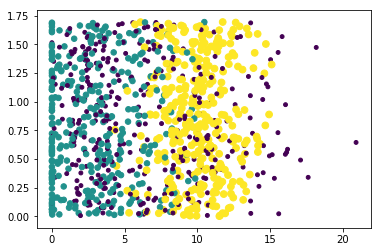

In [25]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:, 2],
          15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

In [27]:
datingDataMat.max(0)

array([9.1273000e+04, 2.0919349e+01, 1.6955170e+00])

In [31]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [32]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [33]:
minVals

array([0.      , 0.      , 0.001156])

In [41]:
datingClassTest()

the classifier came back with: 3, real answer is: 3
the classifier came back with: 2, real answer is: 2
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 3, real answer is: 3
the classifier came back with: 3, real answer is: 3
the classifier came back with: 1, real answer is: 1
the classifier came back with: 3, real answer is: 3
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifi

the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifier came back with: 3, real answer is: 3
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifier came back with: 3, real answer is: 3
the classifier came back with: 1, real answer is: 1
the classifier came back with: 3, real answer is: 3
the classifier came back with: 1, real answer is: 1
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifier came back with: 2, real answer is: 2
the classifier came back with: 1, real answer is: 1
the classifier came back with: 2, real answer is: 2
the classifier came back with: 2, real answer is: 2
the classifier came back with: 2, real answer is: 2
the classifier came back with: 3, real answer is: 3
the classifi

In [6]:
classifyPerson()

percentage of time playing games?10
frequent flier miles?10000
liters of ice cream?0.5
You will like this person:  in small doses


In [10]:
test = img2vector('data/testDigits/0_13.txt')
test[0, 0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
handwriting_test()

classifier came back with 3, answer is 8
classifier came back with 9, answer is 5
classifier came back with 6, answer is 4
classifier came back with 9, answer is 5
classifier came back with 1, answer is 8
classifier came back with 1, answer is 8
classifier came back with 7, answer is 9
classifier came back with 9, answer is 4
classifier came back with 6, answer is 0
classifier came back with 9, answer is 5
classifier came back with 1, answer is 8
classifier came back with 9, answer is 5
total num of errors: 12
total error rate is: 0.012685
